In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
def build_baseline_model(input_shape):
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(512, activation='relu'),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')  # 10 classes
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

baseline_model = build_baseline_model(x_train.shape[1:])
history_baseline = baseline_model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.2
)

C:\Users\bbuser\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.3148 - loss: 1.8876 - val_accuracy: 0.3629 - val_loss: 1.7784
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.3868 - loss: 1.7034 - val_accuracy: 0.3883 - val_loss: 1.7126
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.4205 - loss: 1.6130 - val_accuracy: 0.4325 - val_loss: 1.6098
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.4443 - loss: 1.5505 - val_accuracy: 0.4078 - val_loss: 1.6571
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.4602 - loss: 1.5113 - val_accuracy: 0.4484 - val_loss: 1.5462
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.4723 - loss: 1.4648 - val_accuracy: 0.4261 - val_loss: 1.6287
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.4854 - loss: 1.4375 - val_accuracy: 0.4681 - val_loss: 1.5013
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.4972 - loss: 1.4099 - val_accu

In [6]:
def build_dropout_model(input_shape, dropout_rate=0.5):
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(512, activation='relu'),
        Dropout(dropout_rate),
        Dense(256, activation='relu'),
        Dropout(dropout_rate),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

dropout_model = build_dropout_model(x_train.shape[1:])
history_dropout = dropout_model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.1468 - loss: 2.2340 - val_accuracy: 0.2272 - val_loss: 2.0829
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.1779 - loss: 2.1375 - val_accuracy: 0.2261 - val_loss: 2.0359
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.1796 - loss: 2.1210 - val_accuracy: 0.2293 - val_loss: 2.0617
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.1893 - loss: 2.1021 - val_accuracy: 0.2460 - val_loss: 2.0487
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.1930 - loss: 2.0876 - val_accuracy: 0.2325 - val_loss: 2.0419
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.1944 - loss: 2.0848 - val_accuracy: 0.2572 - val_loss: 2.0247
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.1981 - loss: 2.0828 - val_accuracy: 0.2279 - val_loss: 2.0717
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.2026 - loss: 2.0749 - val_accu

In [7]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_early = dropout_model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop]
)
print("Best epoch:", np.argmax(history_early.history['val_accuracy']) + 1)

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.2298 - loss: 2.0197 - val_accuracy: 0.2490 - val_loss: 2.0121
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.2266 - loss: 2.0229 - val_accuracy: 0.2374 - val_loss: 2.0326
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.2258 - loss: 2.0197 - val_accuracy: 0.2643 - val_loss: 2.0248
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.2222 - loss: 2.0386 - val_accuracy: 0.2657 - val_loss: 2.0146
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.2257 - loss: 2.0186 - val_accuracy: 0.2032 - val_loss: 2.0993
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.2276 - loss: 2.0198 - val_accuracy: 0.2686 - val_loss: 2.0184
Best epoch: 6


In [8]:
def build_l2_model(input_shape, l2_rate=0.001):
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(512, activation='relu', kernel_regularizer=l2(l2_rate)),
        Dense(256, activation='relu', kernel_regularizer=l2(l2_rate)),
        Dense(128, activation='relu', kernel_regularizer=l2(l2_rate)),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

l2_model = build_l2_model(x_train.shape[1:])
history_l2 = l2_model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.3094 - loss: 2.2917 - val_accuracy: 0.3296 - val_loss: 2.0442
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.3758 - loss: 1.8849 - val_accuracy: 0.3586 - val_loss: 1.8905
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.3961 - loss: 1.8008 - val_accuracy: 0.4224 - val_loss: 1.7476
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.4126 - loss: 1.7503 - val_accuracy: 0.4073 - val_loss: 1.7623
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.4278 - loss: 1.7092 - val_accuracy: 0.4248 - val_loss: 1.7227
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.4361 - loss: 1.6820 - val_accuracy: 0.4259 - val_loss: 1.7228
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.4412 - loss: 1.6644 - val_accuracy: 0.4260 - val_loss: 1.7079
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.4509 - loss: 1.6474 - val_acc

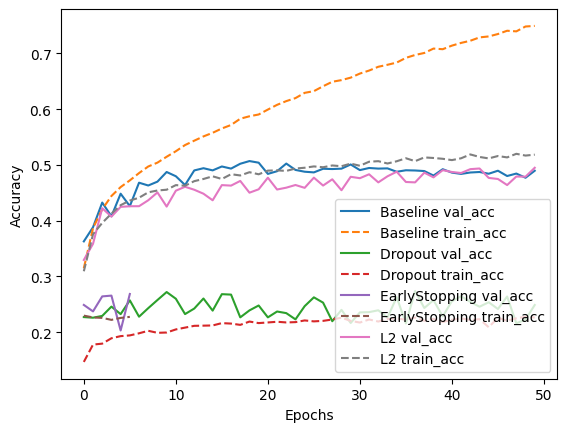

In [9]:
import matplotlib.pyplot as plt

def plot_history(histories, labels):
    for history, label in zip(histories, labels):
        plt.plot(history.history['val_accuracy'], label=f'{label} val_acc')
        plt.plot(history.history['accuracy'], '--', label=f'{label} train_acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_history(
    [history_baseline, history_dropout, history_early, history_l2],
    ['Baseline', 'Dropout', 'EarlyStopping', 'L2']
)